<a href="https://colab.research.google.com/github/GDdeCastro/Computational_Methods_in_Physics/blob/main/Projeto_4_Mec%C3%A2nica_Qu%C3%A2ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In [ ]:

dt = 0.00001 # Passo de tempo
r = 0.075 # Parametro do RK2
L = 1 # metade do tamanho da caixa

w = 100

tf = 2*(2*np.pi/w) # Tempo total
m = 1 
hbar = 1

In [ ]:
dx = np.sqrt(dt/(2*r))

x = np.arange(-L,L,dx); 
t = np.arange(0,tf,dt);

xsize = np.size(x) 
tsize = np.size(t)

R = np.zeros( (xsize,tsize) ) #Parte real
I = np.zeros( (xsize,tsize) ) #Parte complexa

Psi = np.zeros( (xsize,tsize), dtype='complex' )
V = np.zeros( xsize )

V = (1/2) * m*(w**2)*x**2

In [ ]:
def psi_n(n,x):
  global w
  global m
  global hbar
  c_n = (2**n * np.math.factorial(n))**(-1/2)
  alpha =  (m*w/hbar)**(1/2)
  cte = np.sqrt(alpha/np.sqrt(np.pi))
  func = special.hermite(n)
  return c_n*cte*func(alpha*x)*np.exp(-((alpha*x)**2)/2)

def make_Psi(niveis,coeficientes,x):
  sum = 0
  for n in range(np.size(niveis)):
    sum += coeficientes[n]*psi_n(niveis[n],x)
  return sum

In [ ]:
# adicionando condições iniciais
niveis = np.array([0,1,2,3])
coeficientes = np.array([1,1,1,1])
k0 = 50
Psi[:, 0] = make_Psi(niveis,coeficientes,x)
#Psi[:,0] = psi_n(0,x)*np.exp(1j*k0*x)

# condição inicial das partes de psi
R[:,0] = np.real(Psi[:,0]) # Parte real
I[:,0] = np.imag(Psi[:,0]) # Parte complexa

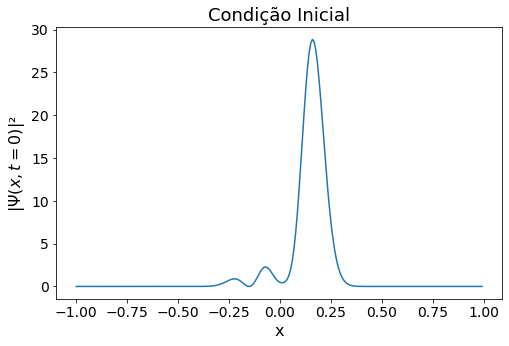

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,np.absolute(Psi[:,0])**2)

ax.set_title('Condição Inicial', fontsize=18)
ax.set_ylabel(r'|$\Psi(x,t=0)$|²', fontsize=16)
ax.set_xlabel('x', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

# ax.legend(fontsize=16)

In [ ]:
def run_RK2(Psi, x, t, V, dt, dx):
  r = dt/(2*dx**2)

  xsize = np.size(x) 
  tsize = np.size(t)

  R_meio = np.zeros( xsize ) # meios passos
  I_meio = np.zeros( xsize )

  R = np.real(Psi) # Parte real
  I = np.imag(Psi) # Parte complexa

  for n in range(0,tsize-1):
    for i in range(0, xsize-1):
      k1_R = -(hbar/m)*r*(I[i+1,n] - 2*I[i,n]+I[i-1,n]) + (1/hbar)*V[i]*I[i,n]*dt
      k1_I = (hbar/m)*r*(R[i+1,n] - 2*R[i,n] + R[i-1,n]) - (1/hbar)*V[i]*R[i,n]*dt

      R_half = R[i,n] + k1_R/2
      I_half = I[i,n] + k1_I/2

      R_meio[i] = R_half
      I_meio[i] = I_half

    # meios passos fora do loop
    k1_R = -(hbar/m)*r*(I[0,n] - 2*I[xsize-1,n]+I[xsize-2,n]) + (1/hbar)*V[xsize-1]*I[xsize-1,n]*dt
    k1_I = (hbar/m)*r*(R[0,n] - 2*R[xsize-1,n] + R[xsize-2,n]) - (1/hbar)*V[xsize-1]*R[xsize-1,n]*dt

    R_half = R[xsize-1,n] + k1_R/2
    I_half = I[xsize-1,n] + k1_I/2

    R_meio[xsize-1] = R_half
    I_meio[xsize-1] = I_half

    for i in range(1, xsize-1):
      k2_R = -(hbar/m)*r*(I_meio[i+1] - 2*I_meio[i] + I_meio[i-1]) + (1/hbar)*V[i]*I_meio[i]*dt
      k2_I = (hbar/m)*r*(R_meio[i+1] - 2*R_meio[i] + R_meio[i-1]) - (1/hbar)*V[i]*R_meio[i]*dt

      R[i, n+1] = R[i,n] + k2_R
      I[i, n+1] = I[i,n] + k2_I

  Psi = R + I*1j

In [ ]:
run_RK2(Psi,x,t, V, dt, dx)
R = np.real(Psi)
I = np.imag(Psi)

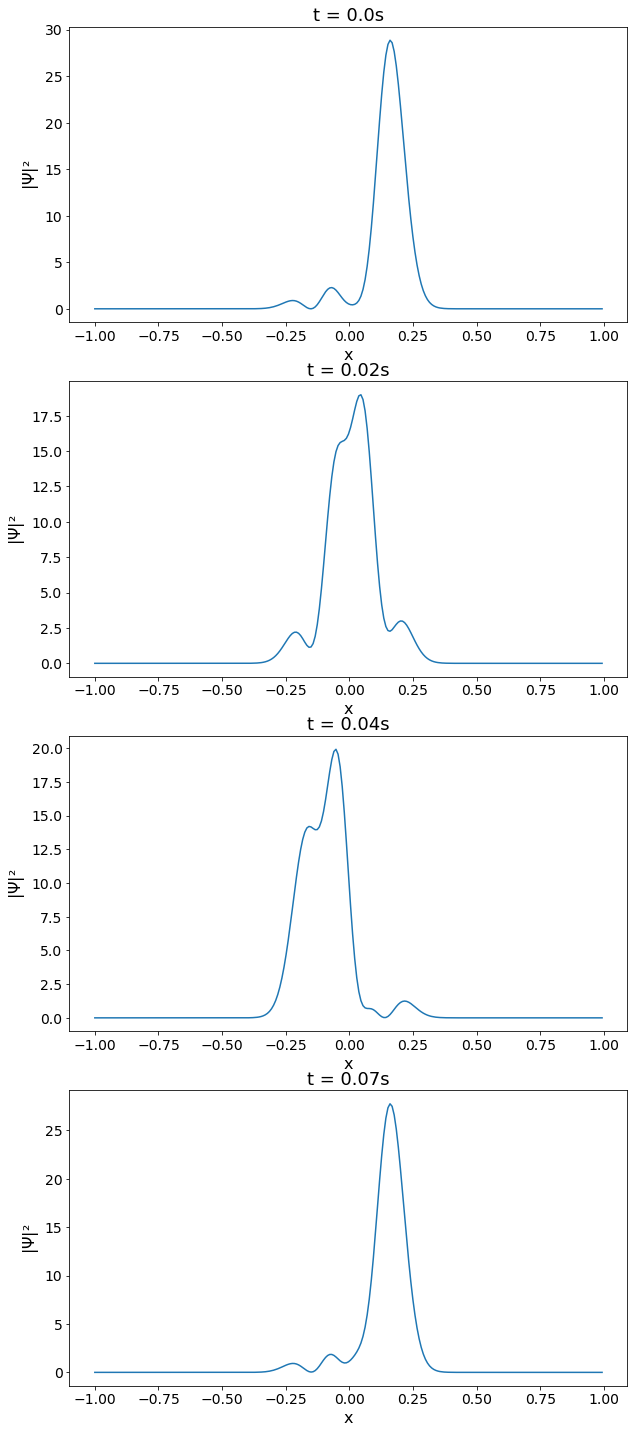

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(10,25))
tstep = [0, 1500, 4000, 6500]

for i in range(np.size(tstep)):
  ax[i].plot(x,np.absolute(Psi[:,tstep[i]])**2, '-')

  ax[i].set_title(f't = {round(tstep[i]*dt,2)}s', fontsize=18)
  ax[i].set_ylabel(r'|$\Psi$|²', fontsize=16)
  ax[i].set_xlabel('x', fontsize=16)

  ax[i].tick_params(axis='both', which='major', labelsize=14)
  ax[i].tick_params(axis='both', which='minor', labelsize=14)

# ax.legend(fontsize=16)

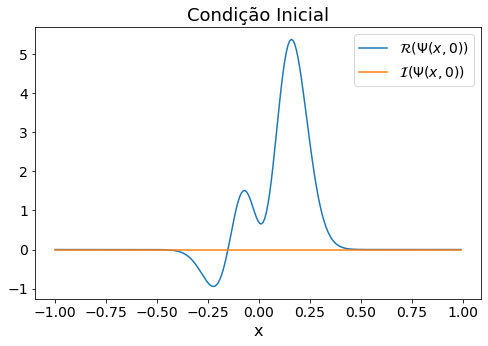

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,np.real(Psi[:,0]), label=r'$\mathcal{R}(\Psi(x,0))}$')
ax.plot(x,np.imag(Psi[:,0]), label=r'$\mathcal{I}(\Psi(x,0))}$')

ax.set_title('Condição Inicial', fontsize=18)
#ax.set_ylabel(r'|$\Psi_0$|²', fontsize=16)
ax.set_xlabel('x', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.legend(fontsize=14)

plt.show()

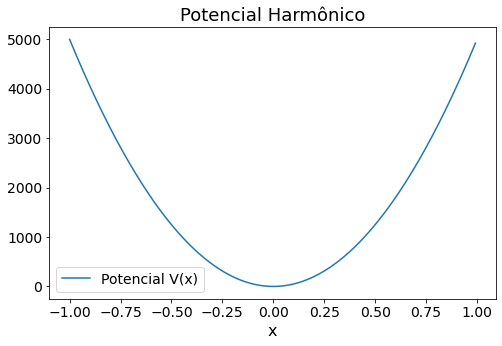

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,V, label=r'Potencial V(x)')

ax.set_title('Potencial Harmônico', fontsize=18)
#ax.set_ylabel(r'|$\Psi_0$|²', fontsize=16)
ax.set_xlabel('x', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.legend(fontsize=14)

plt.show()

In [ ]:
N = np.zeros(tsize)
for i in range(tsize):
  N[i] = np.sum(np.abs(Psi[:,i])**2)*dx

In [ ]:
N

array([4.        , 4.        , 4.        , ..., 4.00000061, 4.00000061,
       4.00000061])

In [ ]:
# cálculo da hamiltoniana
HR = np.zeros(xsize) #Hamiltoniano aplicado a parte real
HI = np.zeros(xsize) #Hamiltoniano aplicado a parte imaginaria
E = np.zeros(tsize, dtype='complex' ) # Valor esperado da energia
X = np.zeros(tsize, dtype='complex') # valor esperado da posição
X2 = np.zeros(tsize, dtype='complex') # valor esperado da posição
for n in range(tsize):
  aux_R_middle = R[:,n]
  aux_R_before = np.roll(R[:,n],1)
  aux_R_after = np.roll(R[:,n],-1)

  aux_I_middle = I[:,n]
  aux_I_before = np.roll(I[:,n],1)
  aux_I_after = np.roll(I[:,n],-1)

  HR[:] = -(hbar**2)/(m*2*dx**2) * (aux_R_before - 2*aux_R_middle + aux_R_after) + V*R[:,n]
  HI[:] = -(hbar**2)/(m*2*dx**2) * (aux_I_before - 2*aux_I_middle + aux_I_after) + V*I[:,n] 

  E[n] = np.sum(np.conjugate(Psi[:,n])*(HR + 1j*HI)*dx)/N[n]
  X[n] = np.sum(np.conjugate(Psi[:,n])*x*Psi[:,n])*dx/N[n]
  X2[n] = np.sum(np.conjugate(Psi[:,n])*(x**2)*Psi[:,n])*dx/N[n]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


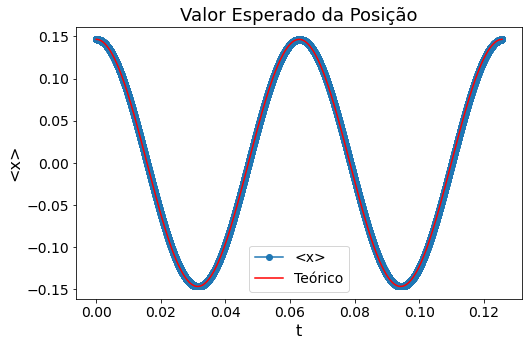

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,X, label=r'<x>',marker='o')

ax.set_title('Valor Esperado da Posição', fontsize=18)
ax.set_ylabel(r'<x>', fontsize=16)
ax.set_xlabel('t', fontsize=16)

if np.sum(np.real(Psi[:,0]) == Psi[:,0])==np.size(Psi[:,0]):

  C = 1/np.sqrt(2) * (np.sqrt(hbar/(m*w))) * np.sum(np.sqrt(np.arange(0,np.size(coeficientes)))*coeficientes*np.roll(coeficientes,1))

  x_teorico = (2*np.real(C)*np.cos(w*t) - 2*np.imag(C)*np.sin(w*t))/(np.sum(coeficientes**2))

  ax.plot(t, x_teorico, color='red', label='Teórico')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.legend(fontsize=14)

plt.show()

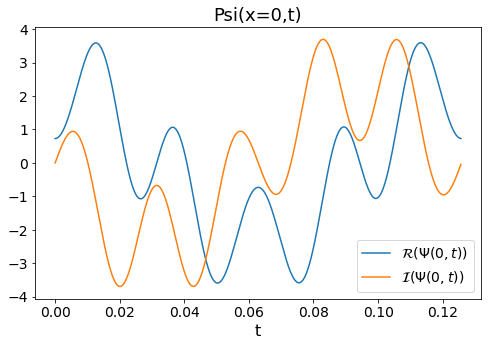

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,np.real(Psi[np.size(x)//2,:]), label=r'$\mathcal{R}(\Psi(0,t))}$')
ax.plot(t,np.imag(Psi[np.size(x)//2,:]), label=r'$\mathcal{I}(\Psi(0,t))}$')

ax.set_title('Psi(x=0,t)', fontsize=18)
#ax.set_ylabel(r'|$\Psi_0$|²', fontsize=16)
ax.set_xlabel('t', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.legend(fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


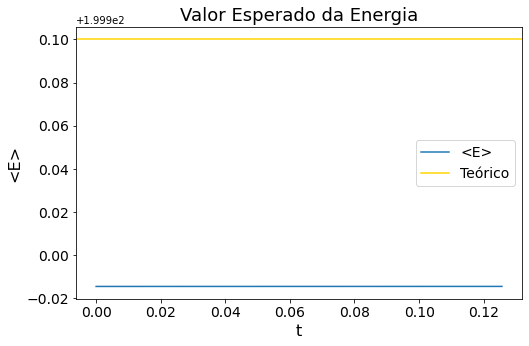

199.88551114693018


In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,E, label=r'<E>')

ax.set_title('Valor Esperado da Energia', fontsize=18)
ax.set_ylabel(r'<E>', fontsize=16)
ax.set_xlabel('t', fontsize=16)

e_teorico = np.sum(hbar*w*(coeficientes**2)*(niveis + 1/2))/(np.sum(coeficientes**2))

ax.axhline([e_teorico], xmin=0, xmax = 1, color='gold', label='Teórico')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

#ax.set_ylim(np.min(E) - np.min(E)/1000,e_teorico + np.min(E)/1000)

ax.legend(fontsize=14)

plt.show()
print(np.mean(np.absolute(E)))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


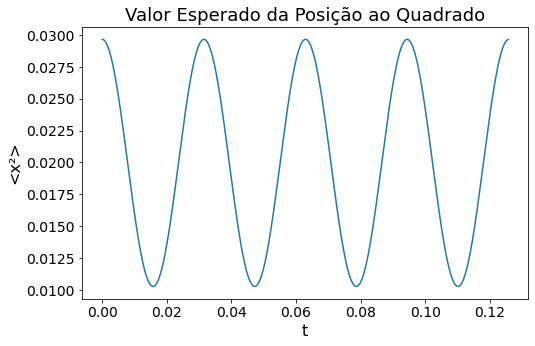

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,X2, label=r'<x²>')

ax.set_title('Valor Esperado da Posição ao Quadrado', fontsize=18)
ax.set_ylabel(r'<x²>', fontsize=16)
ax.set_xlabel('t', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


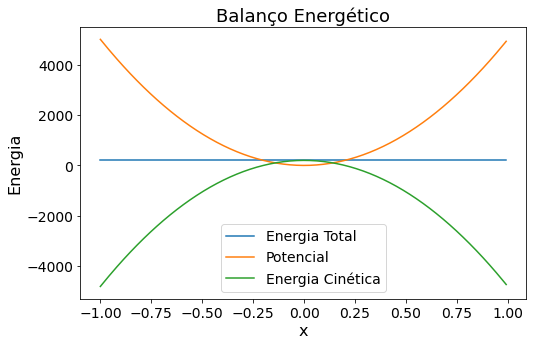

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,[np.mean(E)]*xsize, label=r'Energia Total')
ax.plot(x,V, label=r'Potencial')
ax.plot(x,[np.mean(E)]*xsize-V, label=r'Energia Cinética')

ax.set_title('Balanço Energético', fontsize=18)
ax.set_ylabel(r'Energia', fontsize=16)
ax.set_xlabel('x', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=14)

plt.show()

In [ ]:
'''%matplotlib notebook
def init():
    line.set_data([], [])
    return line

def animate1(it):
    line.set_data(x, np.real(Psi[:,it]))
    line2.set_data(x, np.imag(Psi[:,it]))
    return line

# Cria "canvas" onde a simulacao serah apresentada
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlabel(r"x/L", fontsize=20)
#ax.set_ylabel(r"y(x)", fontsize=20)
ax.set_ylim((-3, 3))
ax.set_xlim((-L, L))
line, = ax.plot([], [], linestyle="solid", fillstyle='full', label=r'$\mathcal{R}(\Psi(x,t))}$')
line2, = ax.plot([], [], linestyle="dotted", fillstyle='full', label=r'$\mathcal{I}(\Psi(x,t))}$')
plt.legend()
plt.tight_layout()

# Define animacao:
anim1 = FuncAnimation(fig, animate1,
                     init_func=init,
                     frames=tsize,
                     interval=2,
                     blit=True)

# Saving in file
f = r"schrodinger.gif" # Coloque o caminho do arquivo
writergif = PillowWriter(fps=60) 
anim1.save(f, writer=writergif)'''

'%matplotlib notebook\ndef init():\n    line.set_data([], [])\n    return line\n\ndef animate1(it):\n    line.set_data(x, np.real(Psi[:,it]))\n    line2.set_data(x, np.imag(Psi[:,it]))\n    return line\n\n# Cria "canvas" onde a simulacao serah apresentada\nfig, ax = plt.subplots(figsize=(8, 4))\nax.set_xlabel(r"x/L", fontsize=20)\n#ax.set_ylabel(r"y(x)", fontsize=20)\nax.set_ylim((-3, 3))\nax.set_xlim((-L, L))\nline, = ax.plot([], [], linestyle="solid", fillstyle=\'full\', label=r\'$\\mathcal{R}(\\Psi(x,t))}$\')\nline2, = ax.plot([], [], linestyle="dotted", fillstyle=\'full\', label=r\'$\\mathcal{I}(\\Psi(x,t))}$\')\nplt.legend()\nplt.tight_layout()\n\n# Define animacao:\nanim1 = FuncAnimation(fig, animate1,\n                     init_func=init,\n                     frames=tsize,\n                     interval=2,\n                     blit=True)\n\n# Saving in file\nf = r"schrodinger.gif" # Coloque o caminho do arquivo\nwritergif = PillowWriter(fps=60) \nanim1.save(f, writer=writergif

In [ ]:
'''% matplotlib notebook
def init2():
    line3.set_data([], [])
    return line3

def animate2(it):
    line3.set_data(x, np.abs(Psi[:,it])**2)
    return line3

# Cria "canvas" onde a simulacao serah apresentada
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.set_xlabel(r"x/L", fontsize=20)
ax2.set_ylabel(r"|Ψ(x,t)|2", fontsize=20)
ax2.set_ylim((0, 10))
ax2.set_xlim((-L, L))
line3, = ax2.plot([], [], 'r', linestyle="solid", fillstyle='full')
plt.tight_layout()

# Define animacao:
anim2 = FuncAnimation(fig2, animate2,
                     init_func=init2,
                     frames=tsize,
                     interval=2,
                     blit=True)

# Saving in file
f = r"schrodinger_prob_dens.gif" # Coloque o caminho do arquivo
writergif = PillowWriter(fps=60) 
anim2.save(f, writer=writergif)'''

'% matplotlib notebook\ndef init2():\n    line3.set_data([], [])\n    return line3\n\ndef animate2(it):\n    line3.set_data(x, np.abs(Psi[:,it])**2)\n    return line3\n\n# Cria "canvas" onde a simulacao serah apresentada\nfig2, ax2 = plt.subplots(figsize=(8, 4))\nax2.set_xlabel(r"x/L", fontsize=20)\nax2.set_ylabel(r"|Ψ(x,t)|2", fontsize=20)\nax2.set_ylim((0, 10))\nax2.set_xlim((-L, L))\nline3, = ax2.plot([], [], \'r\', linestyle="solid", fillstyle=\'full\')\nplt.tight_layout()\n\n# Define animacao:\nanim2 = FuncAnimation(fig2, animate2,\n                     init_func=init2,\n                     frames=tsize,\n                     interval=2,\n                     blit=True)\n\n# Saving in file\nf = r"schrodinger_prob_dens.gif" # Coloque o caminho do arquivo\nwritergif = PillowWriter(fps=60) \nanim2.save(f, writer=writergif)'

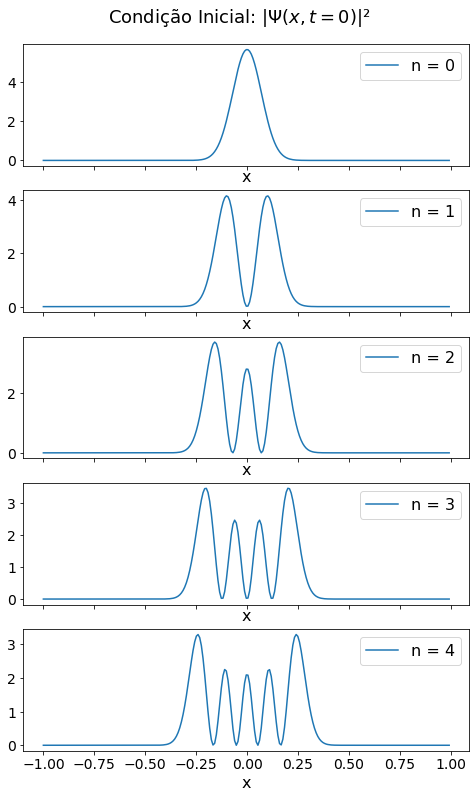

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(8,13),sharex=True)
for i in range(5):
  y = make_Psi([i],[1],x)
  ax[i].plot(x,np.absolute(y)**2,  label=f'n = {i}')

  fig.suptitle(r'Condição Inicial: |$\Psi(x,t=0)$|²', fontsize=18, y=0.92)
  ax[i].set_xlabel('x', fontsize=16)

  ax[i].tick_params(axis='both', which='major', labelsize=14)
  ax[i].tick_params(axis='both', which='minor', labelsize=14)

  ax[i].legend(fontsize=16)
plt.show()

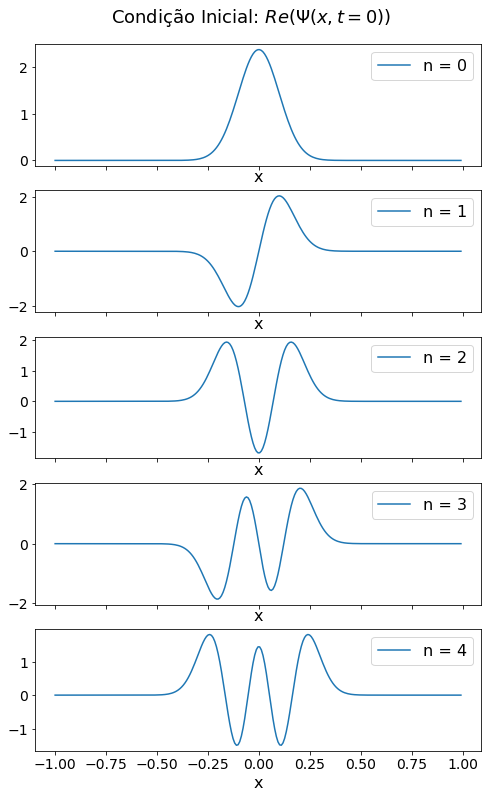

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(8,13),sharex=True)
for i in range(5):
  y = make_Psi([i],[1],x)
  ax[i].plot(x,np.real(y),  label=f'n = {i}')

  fig.suptitle(r'Condição Inicial: $Re(\Psi(x,t=0))$', fontsize=18, y=0.92)
  ax[i].set_xlabel('x', fontsize=16)

  ax[i].tick_params(axis='both', which='major', labelsize=14)
  ax[i].tick_params(axis='both', which='minor', labelsize=14)

  ax[i].legend(fontsize=16)
plt.show()